У цьому домашньому завданні ми продовжуємо працювати з набором даних `Yulu`, з яким почали працювати в "hw 4.3. Робота з DataFrame. Діаграма розсіювання.". Фокус цього ДЗ в тому, аби будувати візуалізації використовуючи методи pandas.DataFrame. Це дозволяє будувати візуалізації ще швидше.

Документація до тої частини бібліотеки, з якою тут працюємо

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

### Профіль колонок набору даних:

- **datetime**: дата та час зібрані погодинно
- **season**: сезон (1: весна, 2: літо, 3: осінь, 4: зима)
- **holiday**: чи є день святковим (витягнуто з http://dchr.dc.gov/page/holiday-schedule)
- **workingday**: якщо день не є вихідним або святковим, то позначається як 1, в іншому випадку – 0.
- **weather**:
  1. Ясно, Мало хмарно, частково хмарно
  2. Туман + Хмарно, Туман + Розірвані хмари, Туман + Мало хмарно, Туман
  3. Легкий сніг, Легкий дощ + Гроза + Розсіяні хмари, Легкий дощ + Розсіяні хмари
  4. Сильний дощ + Крижані кулі + Гроза + Туман, Сніг + Туман
- **temp**: температура в градусах Цельсія
- **atemp**: як відчувається температура в градусах Цельсія
- **humidity**: вологість
- **windspeed**: швидкість вітру
- **casual**: кількість неформальних користувачів
- **registered**: кількість зареєстрованих користувачів
- **count**: загальна кількість велосипедів, взятих в оренду, включаючи неформальних та зареєстрованих користувачів

0. Імпортуйте бібліотеки `matplotlib.pyplot` та `pandas`.  Завантажте дані з файла yulu_rental.csv у pandas.DataFrame df.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('yulu_rental.csv')

1.1. Користуючись групою методів `pandas.plot` побудуйте гістограму кількості зареєстрованих користувачів з налаштуваннями за замовченням (тобто без жодних додаткових параметрів).

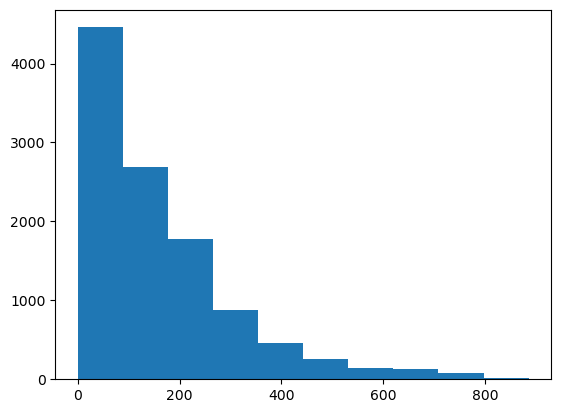

In [9]:
plt.hist(df['registered']);

1.2. Побудуйте гістограму для цього ж показника, але задайте кількість бінів рівну 30 і задайте прозорість 0.5. Додайте підписи за осями ОХ і ОУ, а також назву дівграмі. Опишіть свої спостереження. Що бачите? Чому дані можуть мати такий розподіл?

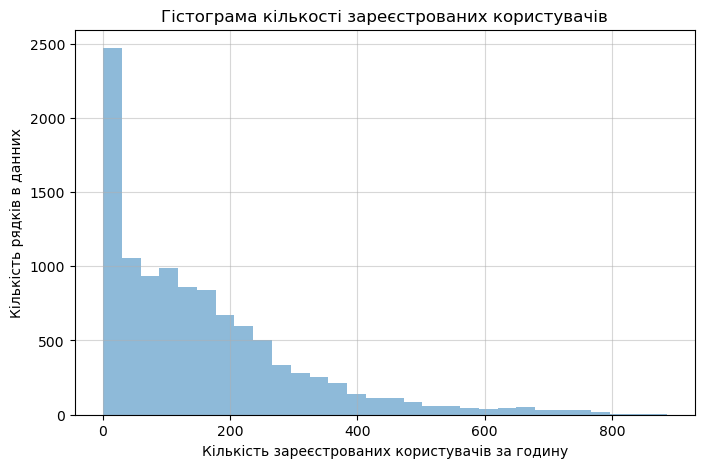

In [80]:
plt.figure(figsize=(8, 5))
plt.hist(df['registered'], bins = 30, alpha = .5) ;
plt.grid(axis='both', alpha=.5)
plt.title('Гістограма кількості зареєстрованих користувачів')
plt.xlabel('Кількість зареєстрованих користувачів за годину')
plt.ylabel('Кількість рядків в данних');

Більшість значень зосереджена зліва, це означає що більшість значень зосереджені в низькому діапазоні зареєстрованих користувачів: 
Чому такий розподіл:
	•У певні години, можливо, реєстрації майже не проводяться (нічний час або години з низькою активністю).
	•Існують піки активності, але вони рідкісні, тому їхній внесок у загальний розподіл мінімальний.

--------

Перетворимо колонку `datetime` на тип даних `pd.datetime` - це нам доопоможе в подальшій роботі. Просто запустіть колонку нижче і занатуйте собі цей метод роботи з колонкою, в якій міститься дата і час.

In [12]:
df['datetime'] = pd.to_datetime(df.datetime)

І створимо нову колонку `dayofweek` для того, аби дослідити детальніше, коли у нас немає поїздок.

In [13]:
df['dayofweek'] = df.datetime.dt.day_of_week

Переглянемо значення в колонкці. Колонка dayofweek містить числа від 0 до 6 включно, де 0 відповідає понеділку.

In [14]:
df[['datetime','dayofweek']][df.dayofweek==0].head()

,datetime,dayofweek
47,2011-01-03 00:00:00,0
48,2011-01-03 01:00:00,0
49,2011-01-03 04:00:00,0
50,2011-01-03 05:00:00,0
51,2011-01-03 06:00:00,0


2. Проведемо аналіз нульової активності зареєстрованих користувачів за днями тижня. Для цього
  1. Виберіть з набору даних усі записи, де кількість зареєстрованих користувачів дорівнює 0. Групуйте ці записи за днями тижня (`dayofweek`) та обчисліть кількість нульових записів для кожного дня.
  2. Після групування, використайте графік типу "bar" для візуалізації результатів. Кожна смужка на графіку має відображати кількість записів у даних для цього дня тижня, коли не було зареєстровано жодної поїздки користувачами.

In [54]:
df_grouped = df[df['registered'] == 0].groupby('dayofweek')['registered'].count()

Text(0, 0.5, 'Кількість днів з нульовою регістрацією')

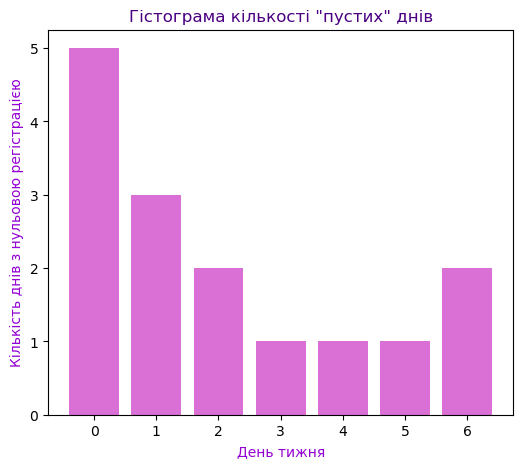

In [78]:
plt.figure(figsize=(6, 5))
plt.bar(df_grouped.index, df_grouped, color = 'orchid')
plt.title('Гістограма кількості "пустих" днів', color = 'indigo')
plt.xlabel('День тижня', color = 'darkviolet')
plt.ylabel('Кількість днів з нульовою регістрацією', color = 'darkviolet')

3. Проведемо аналіз загальної кількості зареєстрованих покристувачів за різними погодними умовами.
Згрупуйте всі дані за погодними умовами і визначте суму кількості зареєстрованих користувачів для кожної погодньої умови.
Побудуйте стовпачасту діаграму, які відобразить результат обчислень.
Зверніться до опису даних та дайте відповідь: чи побудована візуалізація має логічний сенс з точки зору опису даних.

In [57]:
df_weather = df.groupby('weather')['registered'].sum()
df_weather

weather
1    1186163
2     419914
3      87106
4        158
Name: registered, dtype: int64

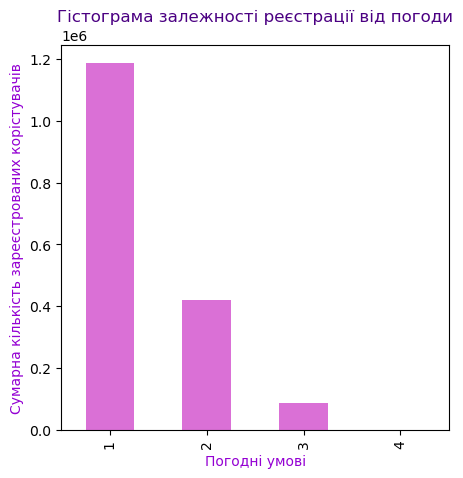

In [81]:
df_weather.plot.bar(figsize = (5,5), color = 'orchid')
plt.title('Гістограма залежності реєстрації від погоди', color = 'indigo')
plt.xlabel('Погодні умові', color = 'darkviolet')
plt.ylabel('Сумарна кількість зареєстрованих корістувачів', color = 'darkviolet');

Чи має логічний сенс візуалізація за зареєстрованими користувачами?

Ні, якщо ми говоримо про реальне використання сервісу (оренду велосипедів). Кількість зареєстрованих користувачів сама по собі не дає нам інформації про те, як погодні умови впливають на активність користувачів у плані оренди велосипедів. Тобто для більш точного аналізу треба зосередитись не стильки на зареєстрованих користувачах, скильки на реальних поїздках, які вони здійснили.

Таким чином, побудована візуалізація за зареєстрованими користувачами не зовсім відповідає логіці опису даних, оскільки краще було б аналізувати загальну кількість орендованих велосипедів (count) за погодними умовами.

4. Користуючись групою методів pandas.plot побудуйте діаграму розсіювання (scatter plot) між вологістю і кількістю зареєстрованих користувачів. Встановіть прозорість на 0.5, а також налаштуйте діаграму так, аби колір кожної точки відповідав значенню температури за відчуттями (`atemp`).

Проаналізуйте графік, що спостерігаєте?

In [83]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,5


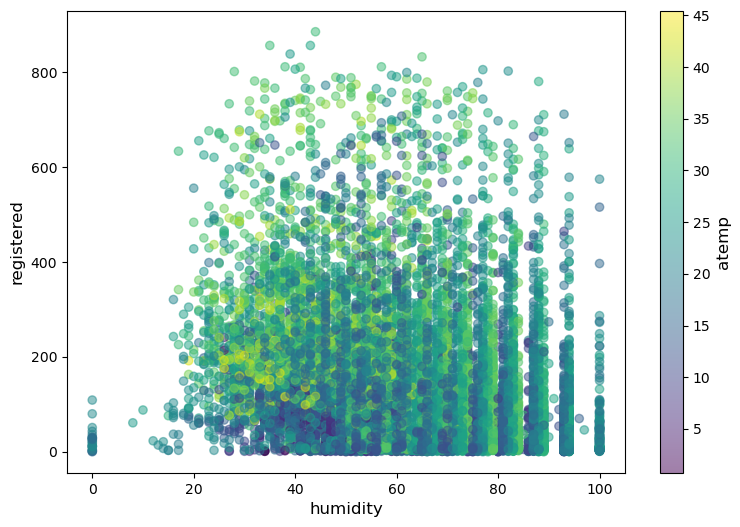

In [94]:
col_x = 'humidity'
col_y = 'registered'
color_feature = 'atemp'

plt.figure(figsize=(9,6))
plt.scatter(df[col_x], df[col_y], alpha=0.5,
            c=df.atemp)
plt.xlabel(col_x, fontsize=12)
plt.ylabel(col_y, fontsize=12)
plt.colorbar().set_label('atemp', fontsize=12);